In [1]:
# Problem Statement - Given 'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age'
# estimate the 'Strength' of cement

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("concrete_data.csv")

In [4]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [13]:
# strength --> dependent variable
Y=data.iloc[:,8]
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [17]:
y=data.Strength
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [20]:
y=data["Strength"]
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [22]:
# Independent variable
X=data.iloc[:,0:8]
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [24]:
X=data.drop(columns=["Strength"])
X.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


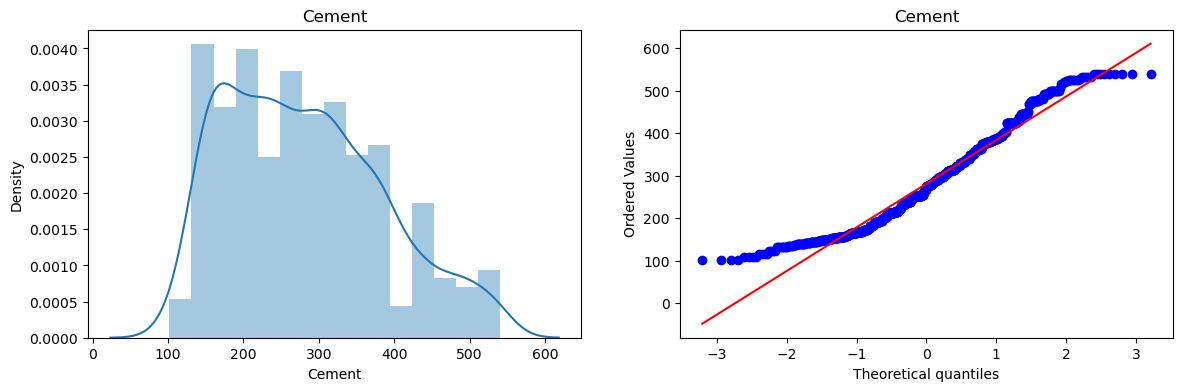

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


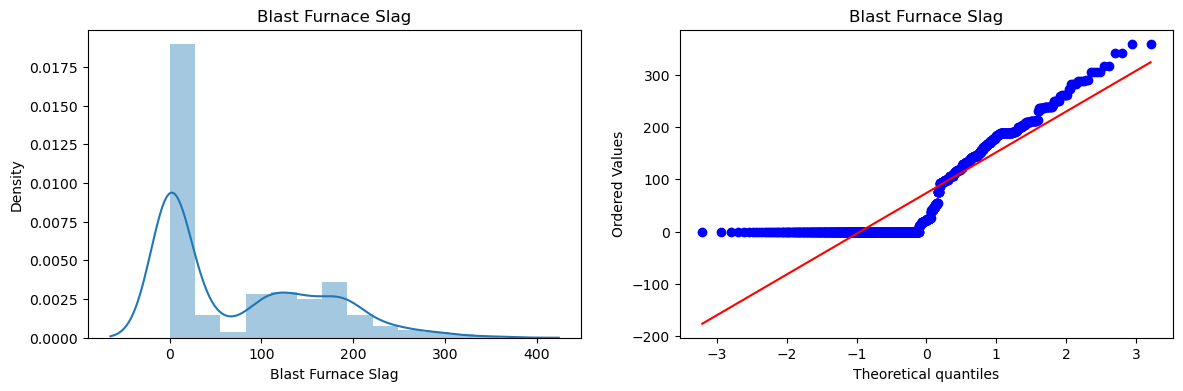

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


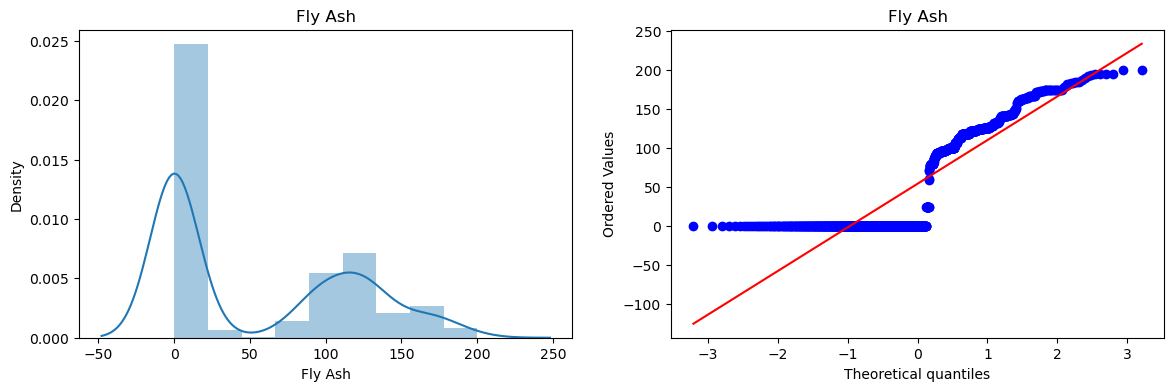

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


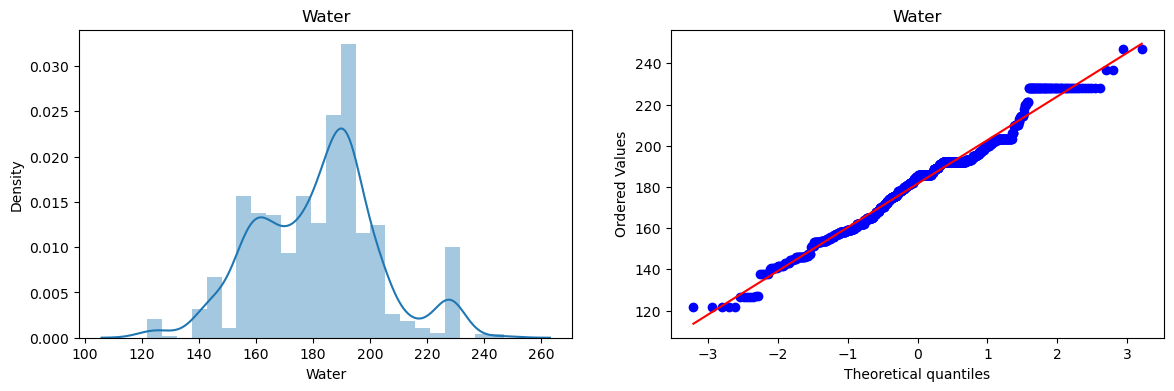

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


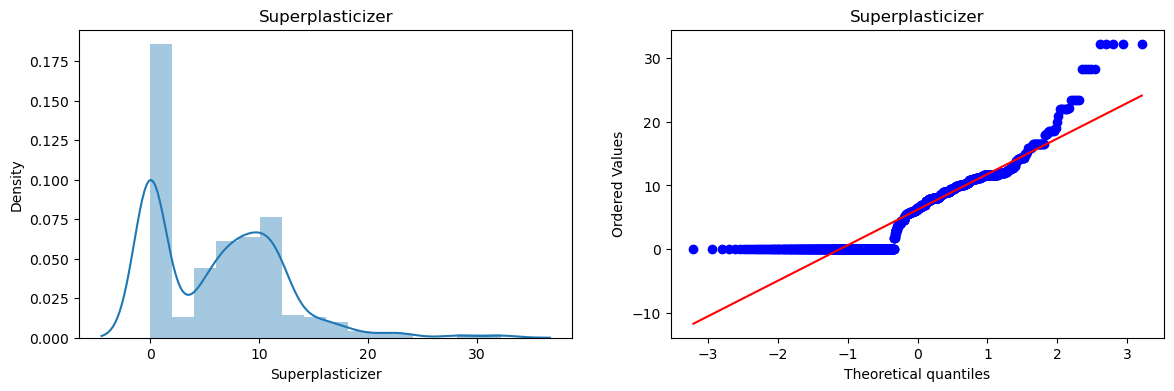

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


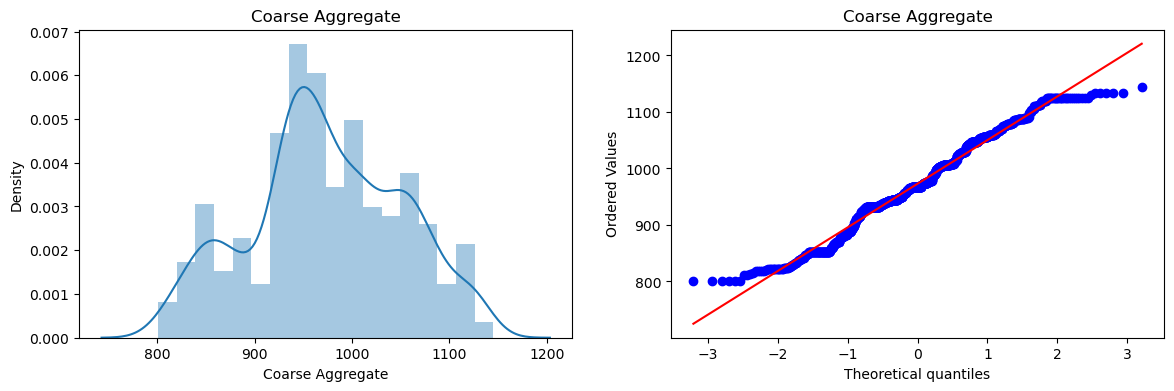

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


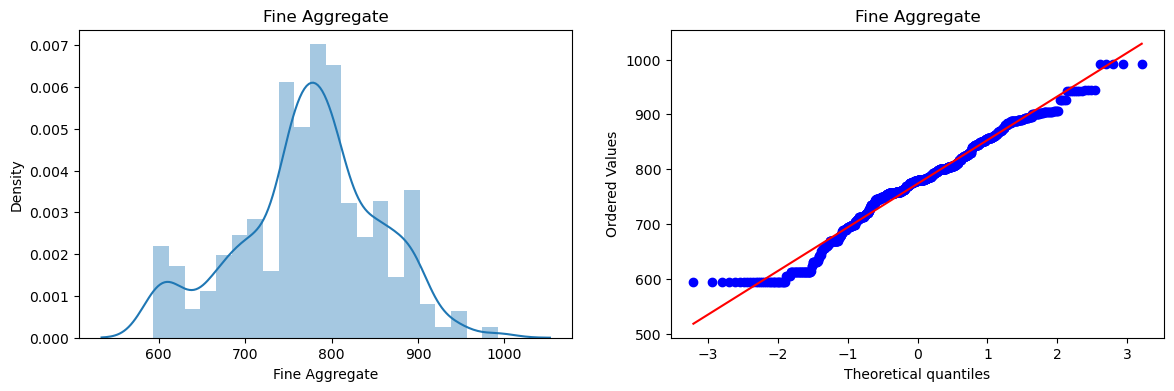

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4058884031.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


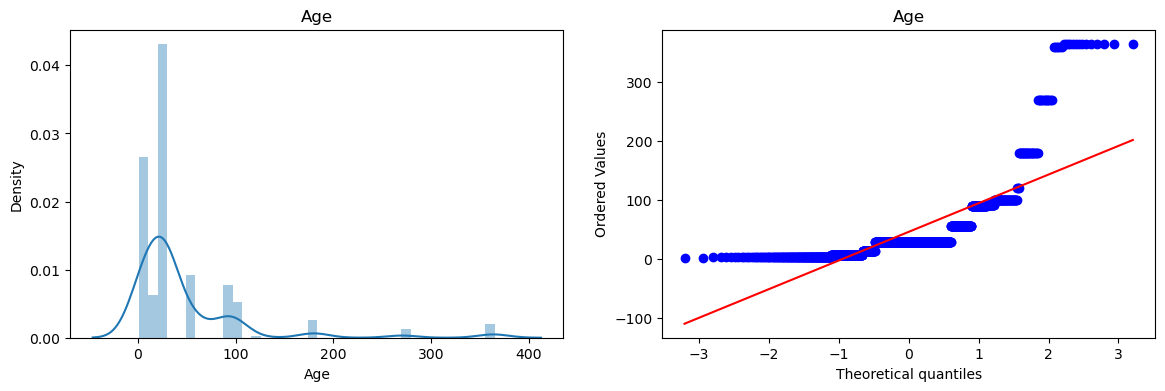

In [34]:
# split it into train and test --> 

# Graph of columns

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

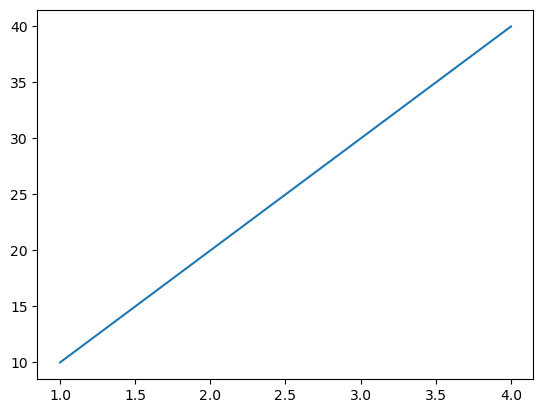

In [35]:
x=[1,2,3,4]
y=[10,20,30,40]

plt.plot(x,y)
plt.show()

# Normalization

Normalization is a method of scaling data so that all of the features have a range of 0 to 1.
This can be done by subtracting the minimum value of each feature from each value and then dividing by the difference between the minimum and maximum values of that feature.
Normalization makes it easier for machine learning algorithms to learn the relationships between the different features in a dataset.
This can lead to improved accuracy of the machine learning model.

In [39]:
import sklearn
from sklearn.preprocessing import MinMaxScaler# normalization

In [40]:
norm=MinMaxScaler()
scaled_data=norm.fit_transform(data)
scaled_data

array([[1.        , 0.        , 0.        , ..., 0.20572002, 0.07417582,
        0.96748474],
       [1.        , 0.        , 0.        , ..., 0.20572002, 0.07417582,
        0.74199576],
       [0.52625571, 0.39649416, 0.        , ..., 0.        , 0.73901099,
        0.47265479],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.46663322, 0.07417582,
        0.26622649],
       [0.1303653 , 0.51947691, 0.        , ..., 0.48896136, 0.07417582,
        0.37922013],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.42022077, 0.07417582,
        0.37461069]])

In [41]:
print(len(scaled_data))

1030


In [42]:
print(scaled_data[0])

[1.         0.         0.         0.32108626 0.07763975 0.69476744
 0.20572002 0.07417582 0.96748474]


In [43]:
data.iloc[0,:]

Cement                 540.00
Blast Furnace Slag       0.00
Fly Ash                  0.00
Water                  162.00
Superplasticizer         2.50
Coarse Aggregate      1040.00
Fine Aggregate         676.00
Age                     28.00
Strength                79.99
Name: 0, dtype: float64

In [44]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [45]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [47]:
scaled_data.shape

(1030, 9)

In [48]:
data.shape

(1030, 9)

In [49]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

# Standarization
Standardization is a method of scaling data so that all of the features have a mean of 0 and a standard deviation of 1.
This can be done by subtracting the mean of each feature from each value and then dividing by the standard deviation of that feature.
Standardization makes it easier for machine learning algorithms to learn the relationships between the different features in a dataset.


In [50]:
# mean = 0 , std = 1

In [51]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [53]:
import sklearn
from sklearn.preprocessing import StandardScaler


In [55]:
scaler=StandardScaler()
standarize_data=scaler.fit_transform(data)
standarize_data

array([[ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  2.64540763],
       [ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  1.56142148],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -2.24091709,
         3.55306569,  0.26662698],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ...,  0.0801067 ,
        -0.27973311, -0.72572939],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.19116644,
        -0.27973311, -0.18253855],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -0.15074782,
        -0.27973311, -0.20469738]])

In [56]:
col = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

In [57]:
new_data=pd.DataFrame(standarize_data,columns=col)

In [58]:
new_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733,0.506781
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733,-0.277762
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733,-0.725729
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733,-0.182539


In [59]:
new_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-4.552992e-16,-1.241725e-16,-5.518779e-17,-1.655634e-16,-8.278168e-17,6.760504e-16,-4.759946e-16,2.069542e-17,-2.759389e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01,-2.005552e+00
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01,-7.251305e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01,-8.222491e-02
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01,6.178744e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00,2.801717e+00


In [ ]:
# split it into train and test --> 

# Graph of columns

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for col in new_data.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(new_data[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(new_data[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

# Power Transformation
One way to deal with non-normally distributed data is to use a transformation, such as the Box-Cox transformation and .shift method.
The Box-Cox transformation can transform the data so that it is more normally distributed.
This can help the machine learning model to learn the relationships between the features more accurately.


In [68]:
# Convert non-gaussian dist --> gaussian/normal dist --> model will work best

from sklearn.preprocessing import PowerTransformer

In [69]:
pt=PowerTransformer()
transformed_data=pt.fit_transform(new_data)
transformed_data

array([[ 2.05650838, -0.95205192, -0.87967207, ..., -1.19614697,
         0.00950547,  2.27730841],
       [ 2.05650838, -0.95205192, -0.87967207, ..., -1.19614697,
         0.00950547,  1.46684657],
       [ 0.6039513 ,  0.99819281, -0.87967207, ..., -2.07733536,
         2.03309437,  0.35789695],
       ...,
       [-1.42533686,  0.97522582,  1.00074512, ...,  0.02678941,
         0.00950547, -0.70199526],
       [-1.28368984,  1.28616188, -0.87967207, ...,  0.14061271,
         0.00950547, -0.09315573],
       [-0.06624139,  0.64264306,  0.66275592, ..., -0.20402303,
         0.00950547, -0.11672768]])

In [72]:
transformed_df=pd.DataFrame(transformed_data,columns=data.columns)
transformed_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.056508,-0.952052,-0.879672,-0.916616,-0.566981,0.862194,-1.196147,0.009505,2.277308
1,2.056508,-0.952052,-0.879672,-0.916616,-0.566981,1.057562,-1.196147,0.009505,1.466847
2,0.603951,0.998193,-0.879672,2.155435,-1.154810,-0.530827,-2.077335,2.033094,0.357897
3,0.603951,0.998193,-0.879672,2.155435,-1.154810,-0.530827,-2.077335,2.141250,0.402112
4,-0.778911,0.921720,-0.879672,0.493335,-1.154810,0.064198,0.624899,2.136860,0.581981
...,...,...,...,...,...,...,...,...,...
1025,0.092621,0.786298,0.806677,-0.085948,0.604129,-1.318224,-0.120092,0.009505,0.580894
1026,0.516259,-0.952052,1.068425,0.679235,0.815850,-1.978349,0.462154,0.009505,-0.195276
1027,-1.425337,0.975226,1.000745,0.525897,0.154557,-1.035222,0.026789,0.009505,-0.701995
1028,-1.283690,1.286162,-0.879672,-0.273966,0.935670,0.208671,0.140613,0.009505,-0.093156


C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


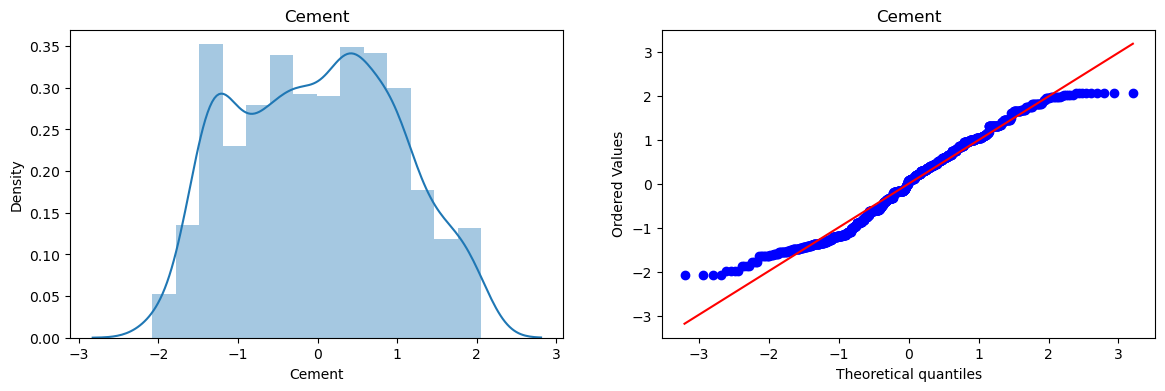

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


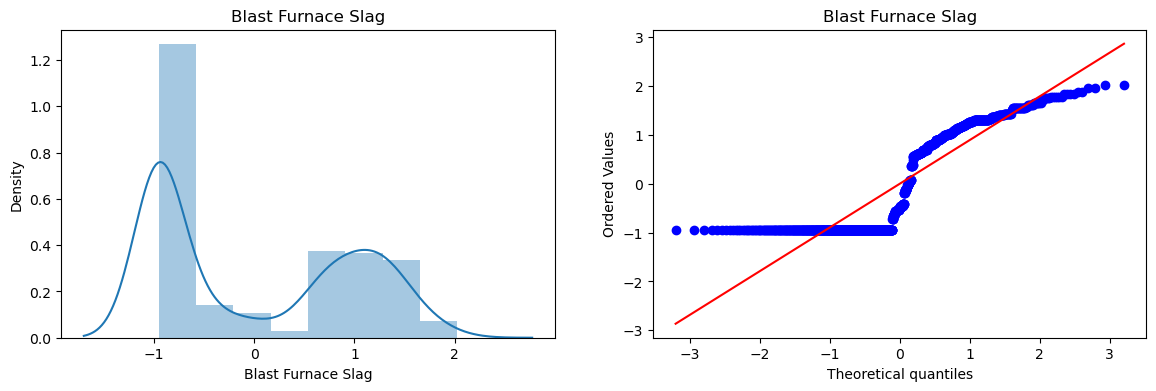

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


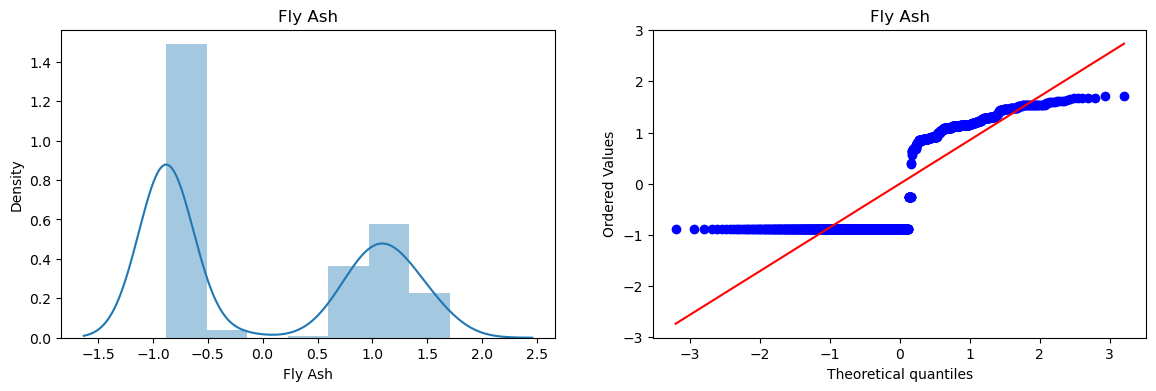

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


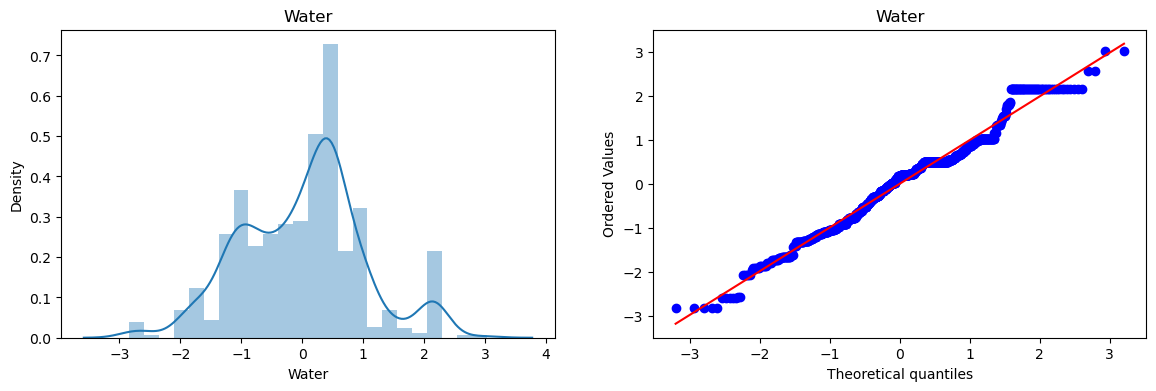

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


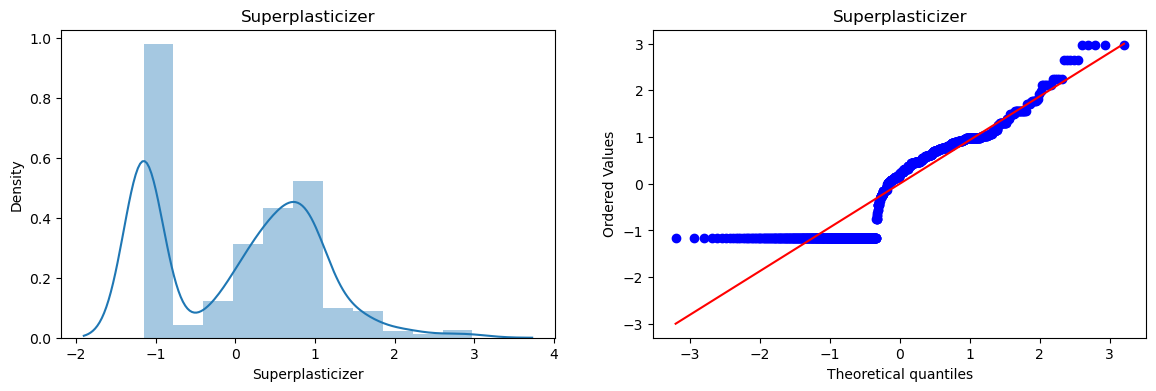

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


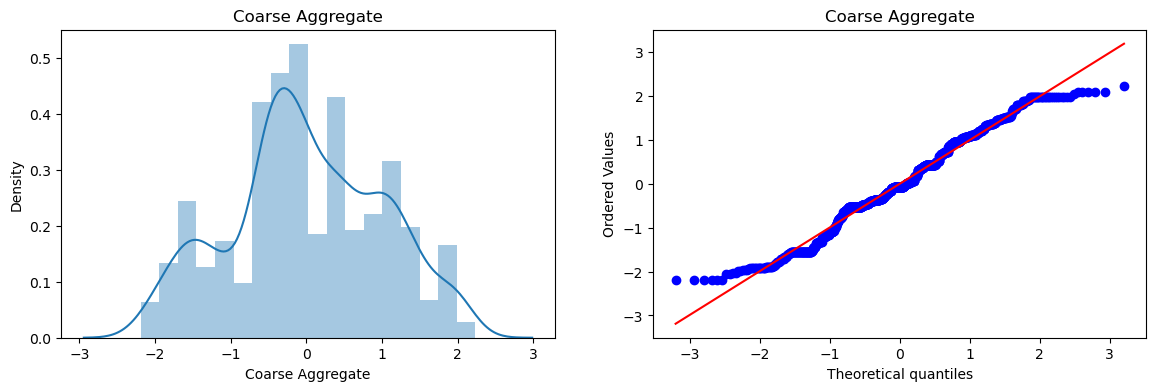

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


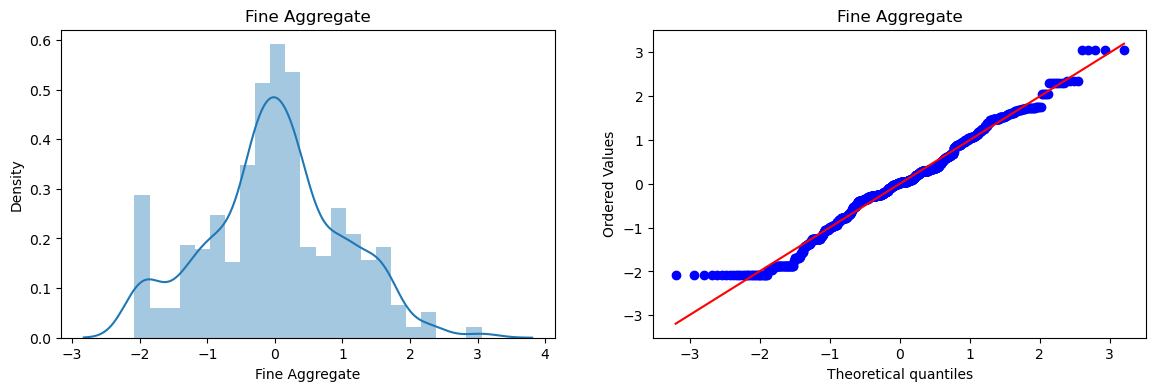

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


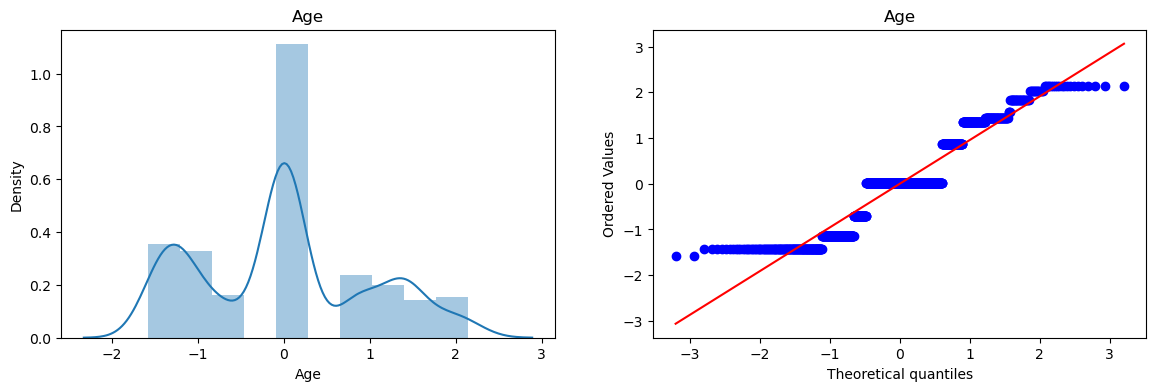

C:\Users\hp\AppData\Local\Temp\ipykernel_1228\4146890477.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[col])


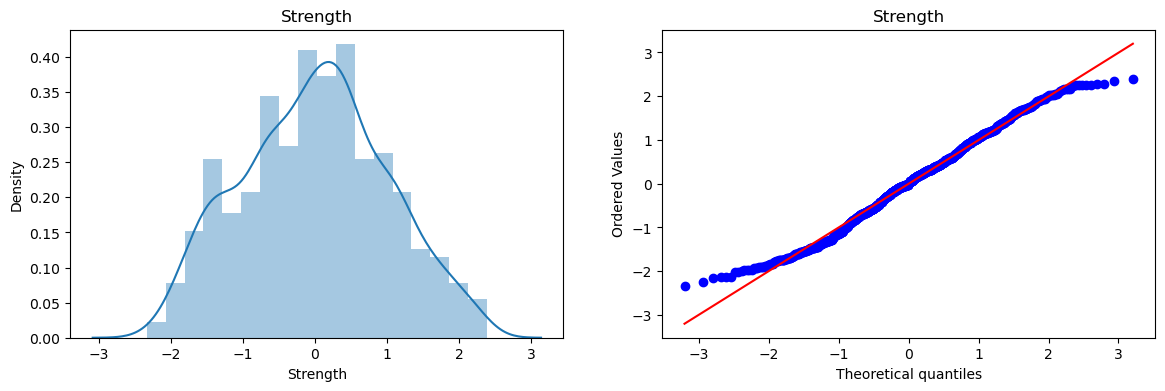

In [81]:
# split it into train and test --> 

# Graph of columns

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for col in transformed_df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(transformed_df[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(transformed_df[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()

# Pre-processing task --> numerical data --> scaling -> normalization // standarization

# Pre processing task -> categorical data --> label encoding // onhot encoding

# Label Encoding:-Label encoding is a process of converting categorical data into numerical data.
This is done by assigning a unique integer value to each category.
For example, if you have a column of data with the categories "f" and "m", you will be label encoded according to the alphabetical order:
"f" = 0
"m" = 1


In [83]:

data = {"Color" : ["Red","Blue","Green","Red","Blue","Green","Red","Blue","Green"],
       "Age" : [25,35,45,55,56,67,65,75,85]}

print(data)

{'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Red', 'Blue', 'Green'], 'Age': [25, 35, 45, 55, 56, 67, 65, 75, 85]}


In [102]:
import pandas as pd

df=pd.DataFrame(data)
df

,Color,Age
0,Red,25
1,Blue,35
2,Green,45
3,Red,55
4,Blue,56
5,Green,67
6,Red,65
7,Blue,75
8,Green,85


In [103]:
copy_df=df.copy()

In [104]:
from sklearn.preprocessing import LabelEncoder


In [105]:
label = LabelEncoder()
df["Color"] = label.fit_transform(df["Color"])
df

,Color,Age
0,2,25
1,0,35
2,1,45
3,2,55
4,0,56
5,1,67
6,2,65
7,0,75
8,1,85


In [106]:
copy_df

,Color,Age
0,Red,25
1,Blue,35
2,Green,45
3,Red,55
4,Blue,56
5,Green,67
6,Red,65
7,Blue,75
8,Green,85


# OneHotEncoder:-One-hot encoding is a process of converting categorical data into a one-hot encoded representation.
This is done by creating a new column for each possible category in the original column.
The value of each new column is either 0 or 1, depending on whether the original column had that value.


In [107]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df["Color"] = ohe.fit_transform(color)

NameError: name 'color' is not defined

In [108]:
df

,Color,Age
0,2,25
1,0,35
2,1,45
3,2,55
4,0,56
5,1,67
6,2,65
7,0,75
8,1,85


In [109]:
df[["Color"]]

,Color
0,2
1,0
2,1
3,2
4,0
5,1
6,2
7,0
8,1


In [110]:
df[["Color"]].ndim

2

In [111]:
print(type(df[["Color"]]))

<class 'pandas.core.frame.DataFrame'>


In [112]:
import numpy as np
color = np.array(df["Color"]).reshape(-1,1)

In [113]:
print(color.ndim)

2


In [116]:
enc=OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.]])

In [118]:
print(len(X))

2


In [119]:
data = {"Name" : ["abc","xyz"],
       "Color" : ["red","blue"]}
df=pd.DataFrame(data)

In [120]:
df

,Name,Color
0,abc,red
1,xyz,blue


In [123]:
enc=OneHotEncoder()
new=enc.fit_transform(df).toarray()

In [124]:
print(new)

[[1. 0. 0. 1.]
 [0. 1. 1. 0.]]
